# Credit risk analysis

We start by reading our data. 

In [1]:
import pandas as pd

df = pd.read_csv('/home/abatsis/Downloads/credit risk imputed.csv')
print(df)

      clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[2000 rows x 5 columns]


Next suffle the data,

In [2]:
df = df.sample(frac=1)
df = df.reset_index(drop=True)
print(df)

      clientid        income        age          loan  default
0         1869  58503.771008  42.372513   7050.432526        0
1          376  58695.094397  29.774410   1826.516302        0
2          650  57827.663100  23.972968  10816.759009        1
3         1972  36275.735863  30.308184    644.384195        0
4          321  36132.423875  34.294260     99.449591        0
...        ...           ...        ...           ...      ...
1995      1078  58910.291775  31.013962   3671.923094        0
1996       562  53033.864130  38.457560  10427.470503        0
1997      1343  39545.959588  43.700867   5787.658045        0
1998      1769  64398.146158  35.597540   1674.905633        0
1999      1575  33867.502264  30.157854   5714.026374        1

[2000 rows x 5 columns]


So that we can split in to test and train data frames. 

In [3]:
df_train = df.iloc[0:1400]
df_test = df.iloc[1401:2000]
df_test = df_test.reset_index(drop=True)

x = df_train.iloc[:,1:4]
y = df_train['default']
x_test = df_test.iloc[:,1:4]
y_test = df_test['default']



We import/define our metrics. 

In [4]:

from scipy.stats import ks_2samp

def ks_statistic(a, b):
    return ks_2samp(b[a==1], b[a!=1]).statistic





We build our logistic regression model. 

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=0, penalty = 'l1')
model.fit(x,y)



LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

We use the model to make predictions on the test dataset.

In [6]:
results = model.predict(x_test)
results_proba = model.predict_proba(x_test)

Bellow we see the confusion matrix of our results.

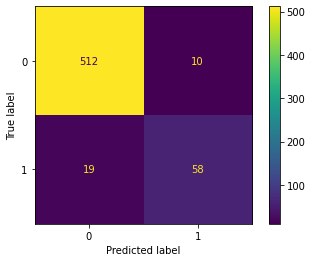

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm_metric = confusion_matrix(y_test, results)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_metric)
disp.plot()
plt.show()




Similarly we get the ks statistic.

In [8]:
from scipy.stats import ks_2samp

def ks_statistic(a, b):
    return ks_2samp(b[a==1], b[a!=1]).statistic

ks_metric = ks_statistic(df_test['default'], results)
print(ks_metric)

0.7340896651241479


Finally we plot the roc curve. 

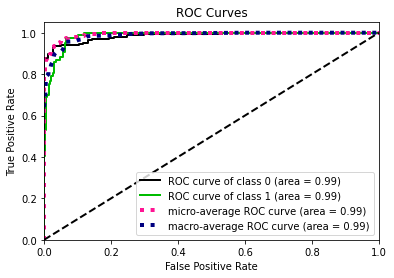

In [9]:
import scikitplot as skplt

results_proba = model.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, results_proba)
plt.show()

Below we build our random forest model while at the same time we tune the number of features hyperparameter. Then we check the same metrics we used for the logistic refression.

In [10]:
from sklearn.ensemble import RandomForestClassifier

scores = []
models = []
for i in range(3):
    model = RandomForestClassifier(n_estimators=1000, max_features=i+1)
    model.fit(x,y)
    models.append(model)
    results = model.predict(x_test)
    ks_metric = ks_statistic(y_test, results)
    scores.append(ks_metric)

max_sc = max(scores)
optimal_model = scores.index(max_sc)
fmodel = models[optimal_model]
print(scores)

[0.9442205304274269, 0.9591232522267005, 0.9591232522267005]


Confusion matrix:

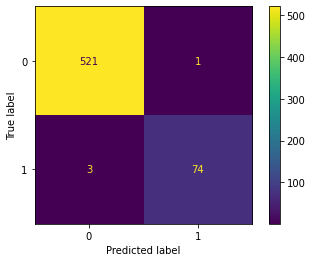

In [11]:
fresults = fmodel.predict(x_test)
fcm_metric = confusion_matrix(y_test, fresults)
disp = ConfusionMatrixDisplay(confusion_matrix=fcm_metric)
disp.plot()
plt.show()

Ks stastisric:

In [12]:
fks_metric = ks_statistic(df_test['default'], fresults)
print(fks_metric)

0.9591232522267005


Roc curve:

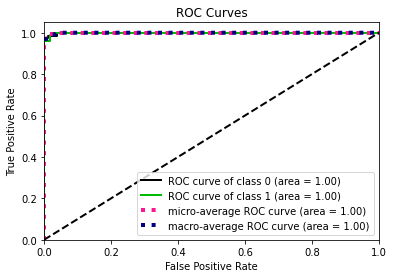

In [13]:
fresults_proba = fmodel.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, fresults_proba)
plt.show()

We can clearly see that the random forest model perfoms better than the logistic regression model. 